In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

%matplotlib notebook

In [18]:
# Global Settings (color of bars, etc.)
os.chdir("C:/Users/m1321/Desktop")
df = pd.read_csv('acumendata.csv').dropna()
bar_colors = ['#1F497D', '#f58231', '#008080', '#e6beff', '#aa6e28', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000080', '#808080', '#FFFFFF', '#000000']

# Parameters Toggle Here:
topic = "Hospital Visit This Quarter (1=Yes)"
x_label = ['Not Visited', 'Visted']
charttype = 'percent'

# Pre-Processing
summary = df.groupby(['Quarter', topic]).size().reset_index(name='Count')
summary_pivot = summary.pivot_table(index='Quarter', columns=topic, values='Count')
quarter_totals = summary_pivot.sum(axis=1)
percentages = summary_pivot.divide(quarter_totals, axis=0)
percentages = percentages.applymap(lambda x: f"{x:.1%}")
percentages.iloc[:,:] = percentages.iloc[:,:].apply(lambda x: x.str.rstrip('%').astype('float'), axis=1)
# col_names = list(summary_pivot.columns)
# col_names_new = ['Female','Male']
# columndict = dict(zip(col_names, col_names_new))
# summary_pivot = summary_pivot.rename(columns = columndict)

if charttype == 'count':
    y_max = 1200
    y_label = "Value Counts"
    data = summary_pivot
else:
    y_max = 100
    y_label = "Percent"
    data = percentages
chartarray = np.array(data)

In [19]:
df

,Observation Number,Quarter,Employee Id,Sex (Male=1),Race,Age,Hospital Visit This Quarter (1=Yes),Salary,Health Score
0,1,1,1,0.0,3.0,27,0,"$36,907",3.7
1,2,2,1,0.0,3.0,28,0,"$37,907",5.0
2,3,3,1,0.0,3.0,28,0,"$38,907",4.0
3,4,4,1,0.0,3.0,28,0,"$39,907",2.3
4,5,5,1,0.0,3.0,29,0,"$40,907",2.1
...,...,...,...,...,...,...,...,...,...
19027,19028,12,1992,1.0,1.0,27,1,"$57,178",4.1
19028,19029,9,1993,1.0,1.0,49,0,"$44,897",4.3
19029,19030,10,1993,1.0,1.0,49,0,"$45,897",10.0
19030,19031,11,1993,1.0,1.0,49,0,"$46,897",3.5


<IPython.core.display.Javascript object>


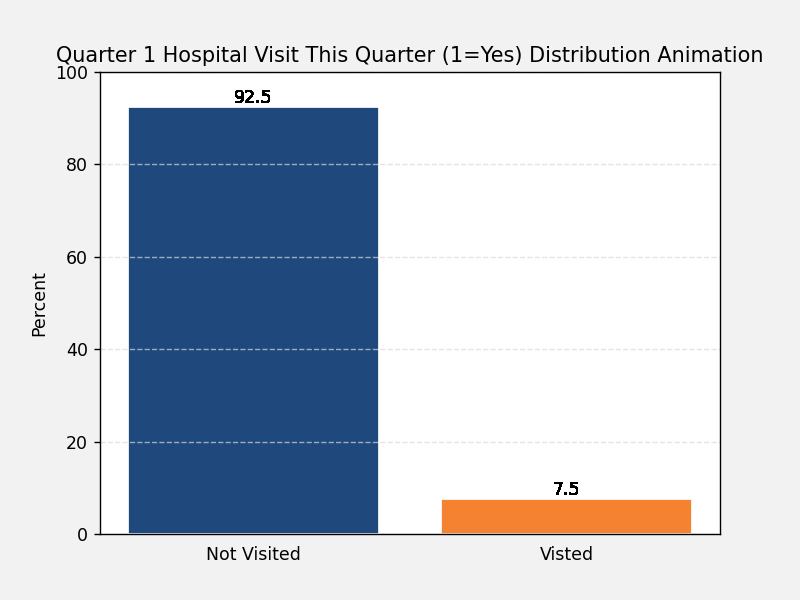

C:\Users\m1321\AppData\Local\Temp\ipykernel_21360\2879587802.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_label)


In [20]:
fig, ax = plt.subplots()
ax.set_ylabel(y_label)
ax.set_ylim(0, y_max)
axisarray = np.array(['{}'.format(val) for val in chartarray[0]])
bars = ax.bar(axisarray, chartarray[0], align='center')

def update(i):
    for j, bar in enumerate(bars):
        bar.set_height(chartarray[i, j])
        for t in ax.texts:
            if np.allclose(t.get_position(), [bar.get_x() + bar.get_width() / 2, chartarray[i-1, j]]):
                t.set_position((bar.get_x() + bar.get_width() / 2, bar.get_height()))
                t.set_text(round(bar.get_height(), 2))
                t.set_visible(True)
        if i == 0:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),round(bar.get_height(), 2), ha='center', va='bottom')
    ax.set_xticklabels(x_label)
    ax.set_title(f'Quarter {i+1} {topic} Distribution Animation')
    return bars

plt.tick_params(axis='x', which='both', bottom=False, top=False)
fig.set_facecolor('#f2f2f2')
ax.grid(axis='y', linestyle='--', alpha=0.7, color='#d9d9d9')

for i, bar in enumerate(bars):
    bar.set_color(bar_colors[i % len(bar_colors)])
    bar.set_edgecolor('white')

# Display the animation
anim = FuncAnimation(fig, update, frames=range(0, 12), interval=1000, blit=True)
plt.show()
anim.save(topic + charttype + '.gif', writer='imagemagick')